d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_2']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_2']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


 5/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_2']
Received: inputs=Tensor(shape=(32, 128, 128, 1, 1))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_2']
Received: inputs=Tensor(shape=(None, 128, 128, 1, 1))
  warnings.warn(msg)
d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_6']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_6']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6964 - loss: 0.8540 - val_accuracy: 1.0000 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9926 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 6.4924e-04 - learning_rate: 0.0010
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 4.0479e-04 - learning_rate: 0.0010
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 3.1231e-04 - learning_rate: 0.0010
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 2.6

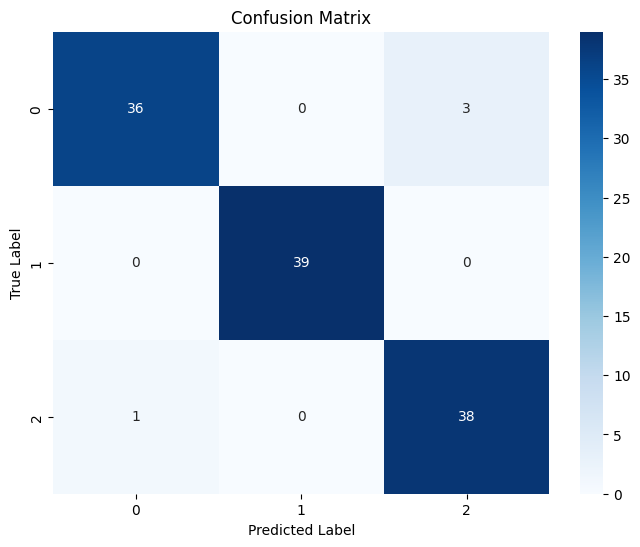

✅ 融合模型已保存为 cnn_concatenate_fusion_all_model.keras


In [2]:
import os 
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **设置随机种子**
SEED = 300   #300的时候效果不错
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# **1️⃣ 加载训练好的 CNN 模型**
model_mfcc = load_model(r"D:\Dataset\Marine-Mammal-Target-Classification\03_CNN\cnn_MFCC_model.keras")
model_wavelet = load_model(r"D:\Dataset\Marine-Mammal-Target-Classification\03_CNN\cnn_wavelet_model_abs.keras")
model_dd = load_model(r"D:\Dataset\Marine-Mammal-Target-Classification\03_CNN\cnn_DelayDoppler_model.keras")

# **2️⃣ 提取特征层**
feature_extractor_mfcc = Model(inputs=model_mfcc.inputs, outputs=model_mfcc.get_layer("dense_4").output)
feature_extractor_wavelet = Model(inputs=model_wavelet.inputs, outputs=model_wavelet.get_layer("dense_4").output)
feature_extractor_dd = Model(inputs=model_dd.inputs, outputs=model_dd.get_layer("dense_12").output)

# **3️⃣ 加载训练数据和测试数据**
X_train_mfcc = np.load(r"D:\Dataset\Temp_Results\MFCC\X_train_mfcc_cnn.npy")
X_train_wavelet = np.load(r"D:\Dataset\Temp_Results\Wavelet\X_train_cwt_abs.npy")
X_train_wavelet = np.expand_dims(X_train_wavelet, axis=-1)
X_train_dd = np.load(r"D:\Dataset\Temp_Results\DelayDoppler\X_train_dd_cnn.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")

X_test_mfcc = np.load(r"D:\Dataset\Temp_Results\MFCC\X_test_mfcc_cnn.npy")
X_test_wavelet = np.load(r"D:\Dataset\Temp_Results\Wavelet\X_test_cwt_abs.npy")
X_test_wavelet = np.expand_dims(X_test_wavelet, axis=-1)
X_test_dd = np.load(r"D:\Dataset\Temp_Results\DelayDoppler\X_test_dd_cnn.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")

# **4️⃣ 归一化数据**
X_train_mfcc = X_train_mfcc.astype(np.float32) / 255.0
X_train_wavelet = X_train_wavelet.astype(np.float32) / 255.0
X_train_dd = X_train_dd.astype(np.float32) / 255.0

X_test_mfcc = X_test_mfcc.astype(np.float32) / 255.0
X_test_wavelet = X_test_wavelet.astype(np.float32) / 255.0
X_test_dd = X_test_dd.astype(np.float32) / 255.0

# **5️⃣ 提取三个模型的特征**
features_train_mfcc = feature_extractor_mfcc.predict(X_train_mfcc)
features_train_wavelet = feature_extractor_wavelet.predict(X_train_wavelet)
features_train_dd = feature_extractor_dd.predict(X_train_dd)

features_test_mfcc = feature_extractor_mfcc.predict(X_test_mfcc)
features_test_wavelet = feature_extractor_wavelet.predict(X_test_wavelet)
features_test_dd = feature_extractor_dd.predict(X_test_dd)

# **6️⃣ 拼接特征**
fused_train_features = np.concatenate([features_train_mfcc, features_train_wavelet, features_train_dd], axis=1)
fused_test_features = np.concatenate([features_test_mfcc, features_test_wavelet, features_test_dd], axis=1)

# **7️⃣ 处理标签**
num_classes = len(np.unique(Y_train))
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# **8️⃣ 构建融合模型**
input_dim = fused_train_features.shape[1]
input_layer = Input(shape=(input_dim,))

x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.4)(x)
x = Dense(num_classes, activation='softmax')(x)

fusion_model = Model(inputs=input_layer, outputs=x)

# **9️⃣ 编译模型**
fusion_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# **🔟 训练模型**
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = fusion_model.fit(fused_train_features, Y_train, epochs=20, batch_size=32,
                           validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# **1️⃣1️⃣ 评估融合模型**
test_loss, test_acc = fusion_model.evaluate(fused_test_features, Y_test, verbose=2)
print(f"\n✅ 融合模型测试集准确率: {test_acc:.4f}")

# **1️⃣2️⃣ 计算分类报告和混淆矩阵**
Y_pred = fusion_model.predict(fused_test_features)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

print("\n📊 分类报告:")
print(classification_report(Y_true, Y_pred_classes))

conf_matrix = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y_true), yticklabels=np.unique(Y_true))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **1️⃣3️⃣ 保存最终融合模型**
fusion_model.save(r"D:\Dataset\Temp_Results\Model\cnn_concatenate_fusion_all_model.keras")
print("✅ 融合模型已保存为 cnn_concatenate_fusion_all_model.keras")
